In [1]:
import numpy as np
import glob
import random
import imageio
import PIL, cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square
import matplotlib.image as mpimg
import skimage
import math
from scipy.ndimage.filters import convolve
from PIL import Image,ImageFilter
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

C:\Users\BirirSospeter\AppData\Local\Temp\ipykernel_21796\2669811142.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\BirirSospeter\AppData\Local\Temp\ipykernel_21796\2669811142.py:14: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [4]:
DATA_DIR = "real_data"
list_dirs = list(glob.glob(DATA_DIR+"*.BMP"))
num_images = len(list_dirs)

In [6]:
import glob
import os

DATA_DIR = "real_data/"
list_dirs = list(glob.glob(DATA_DIR + "*.BMP"))

for image_path in list_dirs:
    print(image_path)

num_images = len(list_dirs)
print("Number of images found:", num_images)


real_data\00000.bmp
real_data\00001.bmp
real_data\00002.bmp
real_data\00003.bmp
real_data\00004.bmp
real_data\00005.bmp
real_data\00006.bmp
real_data\00007.bmp
real_data\00008.bmp
real_data\00009.bmp
Number of images found: 10


C:\Users\BirirSospeter\AppData\Local\Temp\ipykernel_21796\1869435709.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image1 = imageio.imread(display_list[0])
C:\Users\BirirSospeter\AppData\Local\Temp\ipykernel_21796\1869435709.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image2 = imageio.imread(display_list[1])
C:\Users\BirirSospeter\AppData\Local\Temp\ipykernel_21796\1869435709.py:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import 

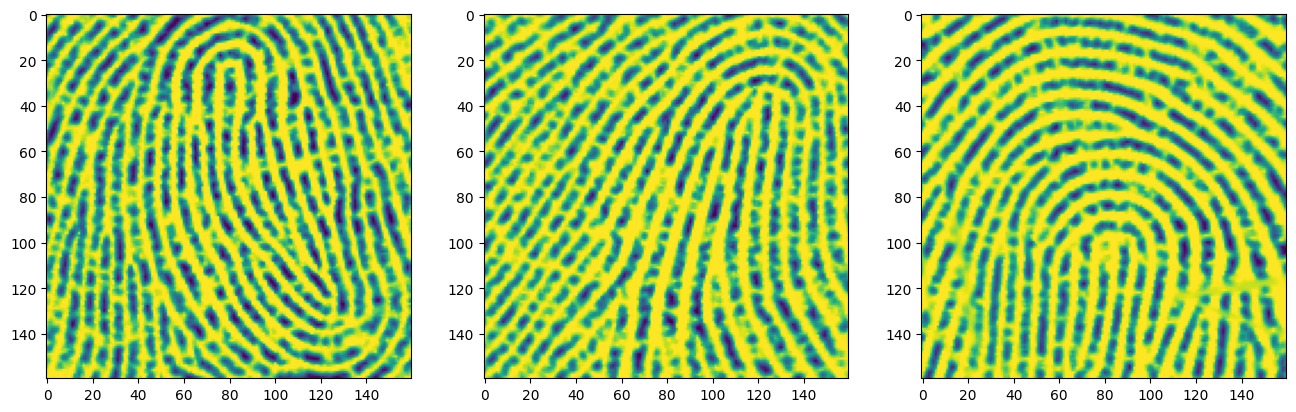

In [7]:
import random
import imageio
import matplotlib.pyplot as plt
import glob

# Setting up the random seed
random.seed(42)

DATA_DIR = "real_data/"
list_dirs = list(glob.glob(DATA_DIR + "*.BMP"))
num_images = len(list_dirs)

# Ensure there are enough images to display
if num_images < 3:
    print("Error: Not enough images in the list.")
else:
    r = random.randint(0, num_images - 3)  # Adjusted the upper bound to avoid index out of range
    display_list = list_dirs[r:r+3]

    image1 = imageio.imread(display_list[0])
    image2 = imageio.imread(display_list[1])
    image3 = imageio.imread(display_list[2])

    fig, axes = plt.subplots(1, 3, figsize=(16, 16))
    axes[0].imshow(image1)
    axes[1].imshow(image2)
    axes[2].imshow(image3)

    plt.show()


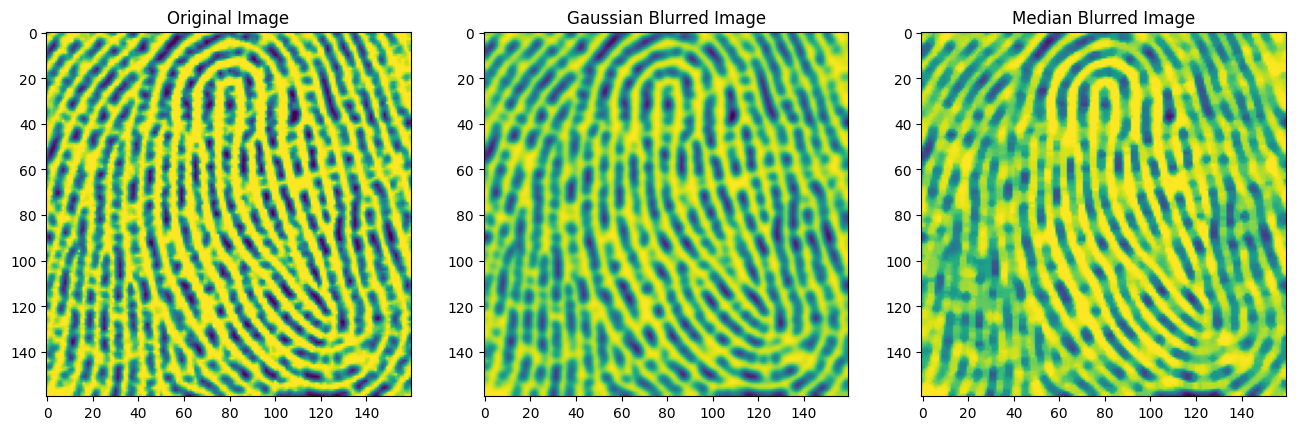

In [8]:
import cv2
import matplotlib.pyplot as plt

# Assuming image1 is already loaded

# Gaussian Blur
gauss_blur = cv2.GaussianBlur(image1, (5, 5), 0)  # You can adjust the kernel size (here: 5x5) as needed

# Median Blur
median_blur = cv2.medianBlur(image1, 5)  # You can adjust the kernel size (here: 5) as needed

# Displaying the images
fig, axes = plt.subplots(1, 3, figsize=(16, 16))
axes[0].set_title("Original Image")
axes[0].imshow(image1)
axes[1].set_title("Gaussian Blurred Image")
axes[1].imshow(gauss_blur)
axes[2].set_title("Median Blurred Image")
axes[2].imshow(median_blur)

plt.show()


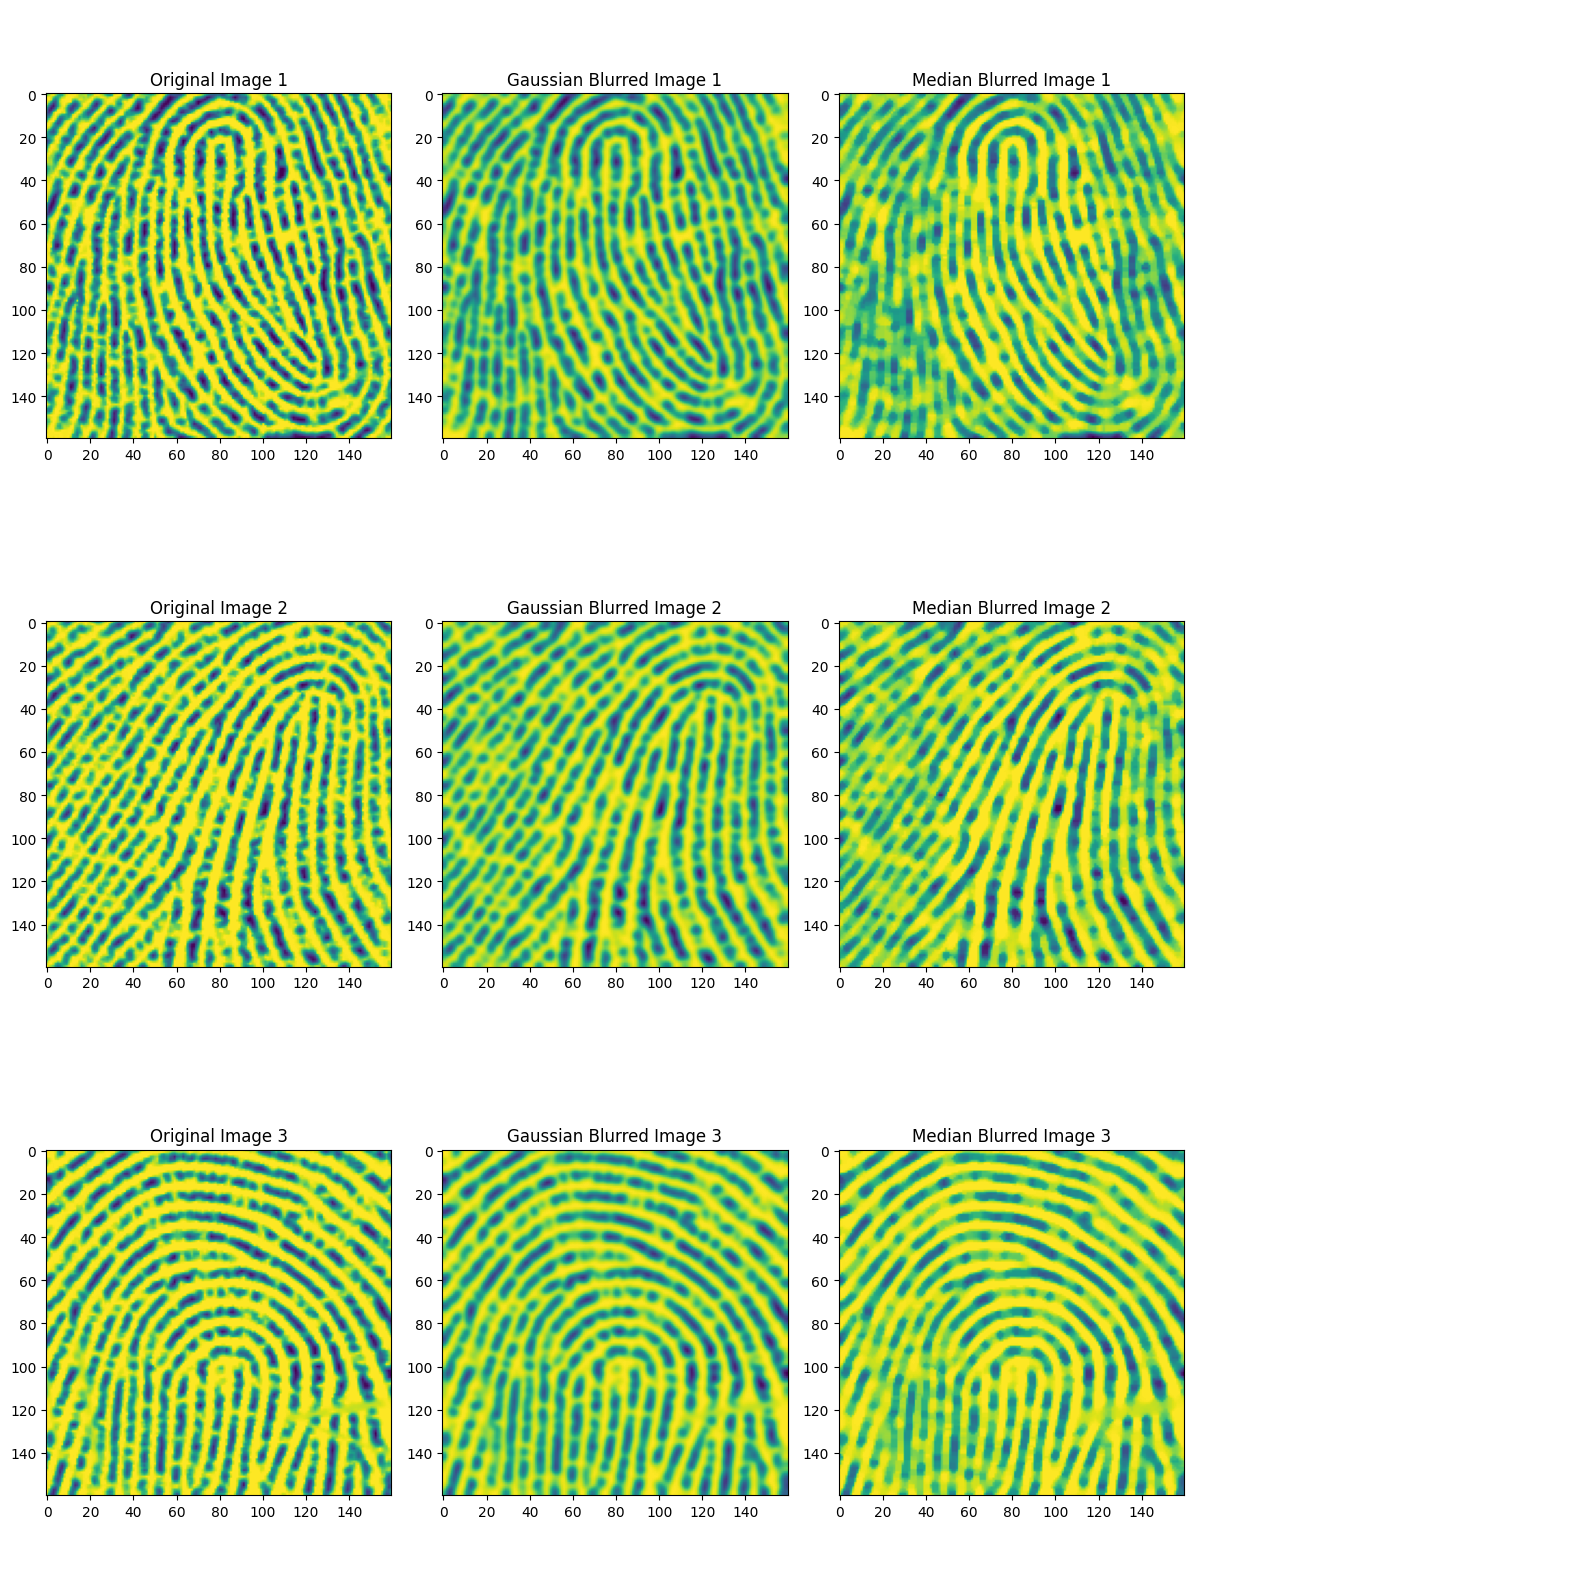

In [9]:
import cv2
import matplotlib.pyplot as plt

# Assuming image1, image2, and image3 are already loaded

# Gaussian Blur and Median Blur for image1
gauss_blur_1 = cv2.GaussianBlur(image1, (5, 5), 0)
median_blur_1 = cv2.medianBlur(image1, 5)

# Gaussian Blur and Median Blur for image2
gauss_blur_2 = cv2.GaussianBlur(image2, (5, 5), 0)
median_blur_2 = cv2.medianBlur(image2, 5)

# Gaussian Blur and Median Blur for image3
gauss_blur_3 = cv2.GaussianBlur(image3, (5, 5), 0)
median_blur_3 = cv2.medianBlur(image3, 5)

# Displaying the images
fig, axes = plt.subplots(3, 4, figsize=(16, 16))

# Original images
axes[0, 0].set_title("Original Image 1")
axes[0, 0].imshow(image1)
axes[1, 0].set_title("Original Image 2")
axes[1, 0].imshow(image2)
axes[2, 0].set_title("Original Image 3")
axes[2, 0].imshow(image3)

# Gaussian blurred images
axes[0, 1].set_title("Gaussian Blurred Image 1")
axes[0, 1].imshow(gauss_blur_1)
axes[1, 1].set_title("Gaussian Blurred Image 2")
axes[1, 1].imshow(gauss_blur_2)
axes[2, 1].set_title("Gaussian Blurred Image 3")
axes[2, 1].imshow(gauss_blur_3)

# Median blurred images
axes[0, 2].set_title("Median Blurred Image 1")
axes[0, 2].imshow(median_blur_1)
axes[1, 2].set_title("Median Blurred Image 2")
axes[1, 2].imshow(median_blur_2)
axes[2, 2].set_title("Median Blurred Image 3")
axes[2, 2].imshow(median_blur_3)

# Empty subplots for better layout
axes[0, 3].axis('off')
axes[1, 3].axis('off')
axes[2, 3].axis('off')

plt.tight_layout()
plt.show()


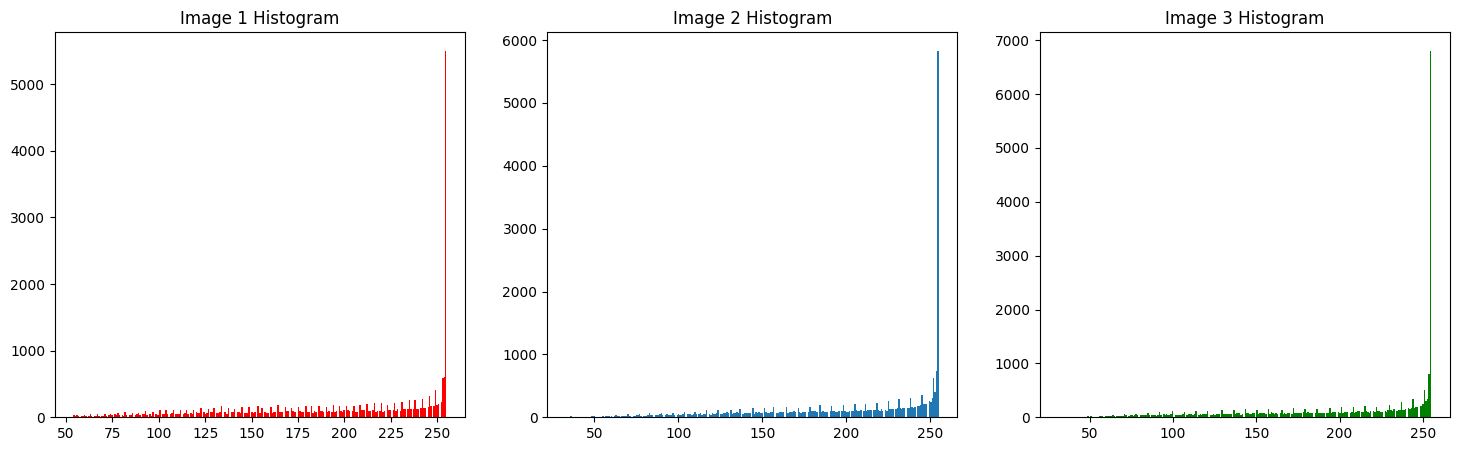

In [10]:
import matplotlib.pyplot as plt

# Plotting histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(image1.ravel(), bins=256, color="r")
axes[0].set_title('Image 1 Histogram')

axes[1].hist(image2.ravel(), bins=256)
axes[1].set_title('Image 2 Histogram')

axes[2].hist(image3.ravel(), bins=256, color="g")
axes[2].set_title('Image 3 Histogram')

plt.show()


In [12]:
# Define a threshold value
THRESHOLD = 128


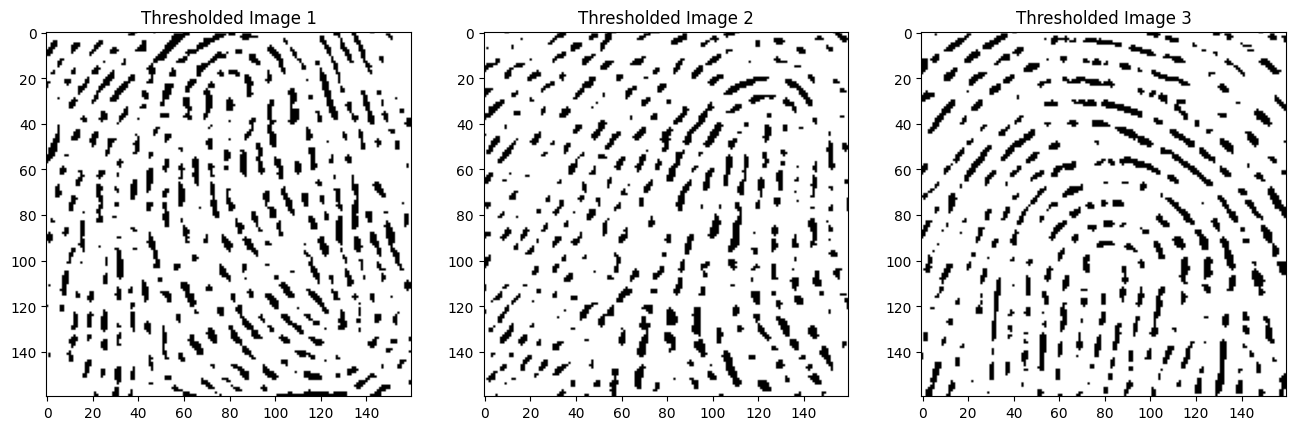

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming image1, image2, and image3 are already defined

# Thresholding the images
image1_thresholded = np.array(image1 > THRESHOLD).astype(int) * 255
image2_thresholded = np.array(image2 > THRESHOLD).astype(int) * 255
image3_thresholded = np.array(image3 > THRESHOLD).astype(int) * 255

# Displaying the thresholded images
fig, axes = plt.subplots(1, 3, figsize=(16, 16))
axes[0].imshow(image1_thresholded, cmap='gray')
axes[0].set_title('Thresholded Image 1')

axes[1].imshow(image2_thresholded, cmap='gray')
axes[1].set_title('Thresholded Image 2')

axes[2].imshow(image3_thresholded, cmap='gray')
axes[2].set_title('Thresholded Image 3')

plt.show()


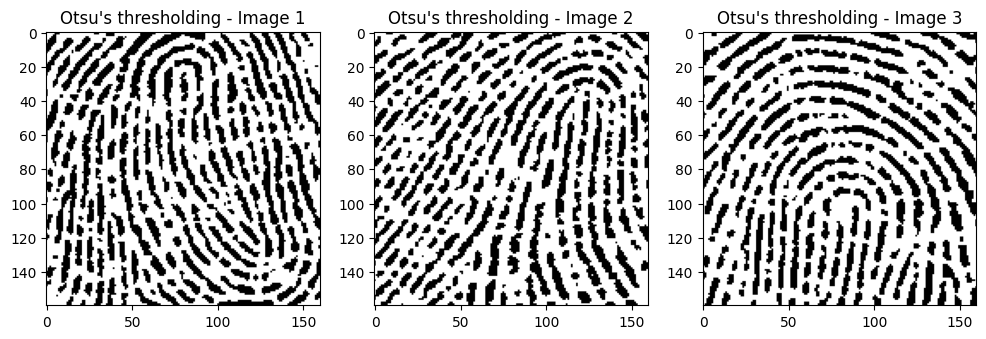

In [14]:
import cv2
import matplotlib.pyplot as plt

# Assuming display_list contains the file paths for the images

# Reading images in grayscale
img1 = cv2.imread(display_list[0], 0)
img2 = cv2.imread(display_list[1], 0)
img3 = cv2.imread(display_list[2], 0)

# Otsu's thresholding
ret1, th1 = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret2, th2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret3, th3 = cv2.threshold(img3, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Displaying the thresholded images
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
axes[0].set_title("Otsu's thresholding - Image 1")
axes[0].imshow(th1, cmap='gray')

axes[1].set_title("Otsu's thresholding - Image 2")
axes[1].imshow(th2, cmap='gray')

axes[2].set_title("Otsu's thresholding - Image 3")
axes[2].imshow(th3, cmap='gray')

plt.show()


In [15]:
# convert to grayscale
img_name = display_list[0]
gray_img_array = np.array(Image.open(img_name).convert('P'))

In [16]:
vertical_robert_filter = np.array([[1,0],[0,-1]])
horizontal_robert_filter = np.array([[0,1],[-1,0]])

vertical_sobel_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
horizontal_sobel_filter = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

vertical_prewitt_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
horizontal_prewitt_filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

print("vertical robert filter\n",vertical_robert_filter )
print("horizontal robert filter\n",horizontal_robert_filter)
print("vertical sobel filter: \n", vertical_sobel_filter)
print("horizontal sobel filter: \n", horizontal_sobel_filter)

print("vertical prewitt filter: \n", vertical_prewitt_filter)
print("horizontal prewitt filter: \n", horizontal_prewitt_filter)

vertical robert filter
 [[ 1  0]
 [ 0 -1]]
horizontal robert filter
 [[ 0  1]
 [-1  0]]
vertical sobel filter: 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
horizontal sobel filter: 
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
vertical prewitt filter: 
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
horizontal prewitt filter: 
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


In [17]:
# implementing:
gray_img = Image.fromarray(gray_img_array)

convolved_img1 = convolve(gray_img,vertical_robert_filter)
convolved_img1 = convolve(convolved_img1,horizontal_robert_filter)

convolved_img2 = convolve(gray_img,vertical_sobel_filter)
convolved_img2 = convolve(convolved_img2,horizontal_sobel_filter)

convolved_img3 =  convolve(gray_img,vertical_prewitt_filter )
convolved_img3 =  convolve(gray_img,horizontal_prewitt_filter )

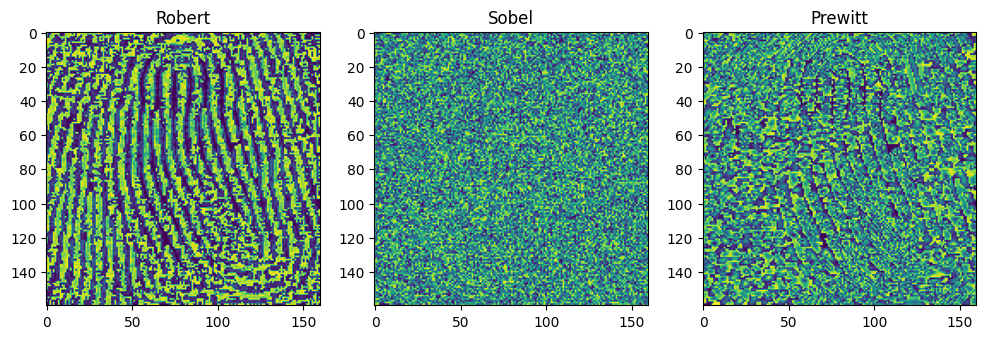

In [18]:
fig, axes = plt.subplots(1,3,figsize = (12,12));
axes[0].set_title("Robert");
axes[0].imshow(convolved_img1);
axes[1].set_title("Sobel");
axes[1].imshow(convolved_img2);
axes[2].set_title("Prewitt");
axes[2].imshow(convolved_img3);

C:\Users\BirirSospeter\AppData\Local\Temp\ipykernel_21796\2710860095.py:4: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  H_elems = hessian_matrix(gray, sigma=sigma, order='rc')


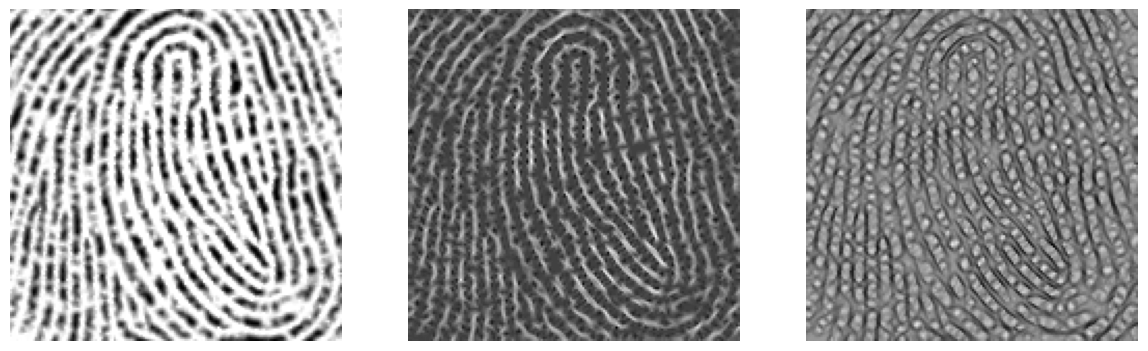

In [19]:
src_path = img_name

def detect_ridges(gray, sigma= 0.1):
    H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges

def plot_images(*images):
    images = list(images)
    n = len(images)
    fig, ax = plt.subplots(ncols=n, sharey=True, figsize = (12,12))
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
    plt.show()

img = cv2.imread(src_path, 0) # 0 imports a grayscale
if img is None:
    raise(ValueError(f"Image didn\'t load. Check that '{src_path}' exists."))

a, b = detect_ridges(img, sigma=0.15)

plot_images(img, a, b)

In [20]:
def getTerminationBifurcation(img, mask):
    img = img == 255;
    (rows, cols) = img.shape;
    minutiaeTerm = np.zeros(img.shape);
    minutiaeBif = np.zeros(img.shape);
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            if(img[i][j] == 1):
                block = img[i-1:i+2,j-1:j+2];
                block_val = np.sum(block);
                if(block_val == 2):
                    minutiaeTerm[i,j] = 1;
                elif(block_val == 4):
                    minutiaeBif[i,j] = 1;
    
    mask = convex_hull_image(mask>0)
    mask = erosion(mask, square(5))         
    minutiaeTerm = np.uint8(mask)*minutiaeTerm
    return(minutiaeTerm, minutiaeBif)

In [21]:
class MinutiaeFeature(object):
    def __init__(self, locX, locY, Orientation, Type):
        self.locX = locX;
        self.locY = locY;
        self.Orientation = Orientation;
        self.Type = Type;

def computeAngle(block, minutiaeType):
    angle = 0
    (blkRows, blkCols) = np.shape(block);
    CenterX, CenterY = (blkRows-1)/2, (blkCols-1)/2
    if(minutiaeType.lower() == 'termination'):
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if((i == 0 or i == blkRows-1 or j == 0 or j == blkCols-1) and block[i][j] != 0):
                    angle = -math.degrees(math.atan2(i-CenterY, j-CenterX))
                    sumVal += 1
                    if(sumVal > 1):
                        angle = float('nan');
        return(angle)
    elif(minutiaeType.lower() == 'bifurcation'):
        (blkRows, blkCols) = np.shape(block);
        CenterX, CenterY = (blkRows - 1) / 2, (blkCols - 1) / 2
        angle = []
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if ((i == 0 or i == blkRows - 1 or j == 0 or j == blkCols - 1) and block[i][j] != 0):
                    angle.append(-math.degrees(math.atan2(i - CenterY, j - CenterX)))
                    sumVal += 1
        if(sumVal != 3):
            angle = float('nan')
        return(angle)


def extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif):
    FeaturesTerm = []

    minutiaeTerm = skimage.measure.label(minutiaeTerm, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeTerm)
    
    WindowSize = 2          
    FeaturesTerm = []
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Termination')
        FeaturesTerm.append(MinutiaeFeature(row, col, angle, 'Termination'))

    FeaturesBif = []
    minutiaeBif = skimage.measure.label(minutiaeBif, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeBif)
    WindowSize = 1 
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Bifurcation')
        FeaturesBif.append(MinutiaeFeature(row, col, angle, 'Bifurcation'))
    return(FeaturesTerm, FeaturesBif)

def ShowResults(skel, TermLabel, BifLabel):
    minutiaeBif = TermLabel * 0;
    minutiaeTerm = BifLabel * 0;

    (rows, cols) = skel.shape
    DispImg = np.zeros((rows, cols, 3), np.uint8)
    DispImg[:, :, 0] = skel;
    DispImg[:, :, 1] = skel;
    DispImg[:, :, 2] = skel;

    RP = skimage.measure.regionprops(BifLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeBif[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (255, 0, 0));

    RP = skimage.measure.regionprops(TermLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeTerm[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (0, 0, 255));
        
    plt.figure(figsize=(6,6))
    plt.title("Minutiae extraction results")
    plt.imshow(DispImg)

In [31]:
# Define a threshold value
THRESHOLD1 = 28

In [1]:
import cv2
import numpy as np
import skimage.morphology
import skimage.measure

# Assuming these functions are defined elsewhere
def getTerminationBifurcation(skel, mask):
    # Your implementation here
    # Ensure to return minutiaeTerm and minutiaeBif
    minutiaeTerm = None  # Replace None with your implementation
    minutiaeBif = None   # Replace None with your implementation
    return minutiaeTerm, minutiaeBif

def extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif):
    FeaturesTerm = []
    # Your implementation here
    return FeaturesTerm, FeaturesBif

def ShowResults(skel, TermLabel, BifLabel):
    # Your implementation here
    pass

# Assuming these variables are defined elsewhere
THRESHOLD1 = 128
display_list = ["image1.jpg", "image2.jpg"]  # Example list of image file names

img_name = display_list[1]
img = cv2.imread(img_name, 0)
img = np.array(img > THRESHOLD1).astype(int)
skel = skimage.morphology.skeletonize(img)
skel = np.uint8(skel) * 255
mask = img * 255

(minutiaeTerm, minutiaeBif) = getTerminationBifurcation(skel, mask)
FeaturesTerm, FeaturesBif = extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif)
BifLabel = skimage.measure.label(minutiaeBif, connectivity=1)
TermLabel = skimage.measure.label(minutiaeTerm, connectivity=1)
ShowResults(skel, TermLabel, BifLabel)


TypeError: '>' not supported between instances of 'NoneType' and 'int'